## Credit Card Fraud Detection

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from time import strptime

plt.rcParams['figure.figsize'] = (15, 10)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('fraudTrain.csv')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
# Dropping columns that are not important
drop_columns = ['Unnamed: 0', 'cc_num', 
               'street', 'dob']
df.drop(drop_columns, axis = 1, inplace = True)

In [ ]:
# Defining functions to extract date and time of features

def date_time_extractor(data):  
    date = pd.to_datetime(data)    
    return date

In [75]:
# This cell can take about 5-10 minutes depending on the speed of the processor
df['transaction_date'] = df['trans_date_trans_time'].apply(date_time_extractor)

In [76]:
# Extracting individual features from dates and times derived earlier
df['year'] = df['transaction_date'].dt.year
df['month'] = df['transaction_date'].dt.month
df['day'] = df['transaction_date'].dt.day

# Extracting hour, minute and second from the data
df['hour'] = df['transaction_date'].dt.hour
df['minute'] = df['transaction_date'].dt.minute
df['second'] = df['transaction_date'].dt.second

In [77]:
df.head()

,trans_date_trans_time,category,amt,first,last,gender,city,state,zip,lat,...,merch_lat,merch_long,is_fraud,transaction_date,year,month,day,hour,minute,second
0,2019-01-01 00:00:18,misc_net,4.97,Jennifer,Banks,F,Moravian Falls,NC,28654,36.0788,...,36.011293,-82.048315,0,2019-01-01 00:00:18,2019,1,1,0,0,18
1,2019-01-01 00:00:44,grocery_pos,107.23,Stephanie,Gill,F,Orient,WA,99160,48.8878,...,49.159047,-118.186462,0,2019-01-01 00:00:44,2019,1,1,0,0,44
2,2019-01-01 00:00:51,entertainment,220.11,Edward,Sanchez,M,Malad City,ID,83252,42.1808,...,43.150704,-112.154481,0,2019-01-01 00:00:51,2019,1,1,0,0,51
3,2019-01-01 00:01:16,gas_transport,45.00,Jeremy,White,M,Boulder,MT,59632,46.2306,...,47.034331,-112.561071,0,2019-01-01 00:01:16,2019,1,1,0,1,16
4,2019-01-01 00:03:06,misc_pos,41.96,Tyler,Garcia,M,Doe Hill,VA,24433,38.4207,...,38.674999,-78.632459,0,2019-01-01 00:03:06,2019,1,1,0,3,6


In [10]:
df.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender',
       'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'trans_num',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'transaction_date',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [78]:
df.head()

,trans_date_trans_time,category,amt,first,last,gender,city,state,zip,lat,...,merch_lat,merch_long,is_fraud,transaction_date,year,month,day,hour,minute,second
0,2019-01-01 00:00:18,misc_net,4.97,Jennifer,Banks,F,Moravian Falls,NC,28654,36.0788,...,36.011293,-82.048315,0,2019-01-01 00:00:18,2019,1,1,0,0,18
1,2019-01-01 00:00:44,grocery_pos,107.23,Stephanie,Gill,F,Orient,WA,99160,48.8878,...,49.159047,-118.186462,0,2019-01-01 00:00:44,2019,1,1,0,0,44
2,2019-01-01 00:00:51,entertainment,220.11,Edward,Sanchez,M,Malad City,ID,83252,42.1808,...,43.150704,-112.154481,0,2019-01-01 00:00:51,2019,1,1,0,0,51
3,2019-01-01 00:01:16,gas_transport,45.00,Jeremy,White,M,Boulder,MT,59632,46.2306,...,47.034331,-112.561071,0,2019-01-01 00:01:16,2019,1,1,0,1,16
4,2019-01-01 00:03:06,misc_pos,41.96,Tyler,Garcia,M,Doe Hill,VA,24433,38.4207,...,38.674999,-78.632459,0,2019-01-01 00:03:06,2019,1,1,0,3,6


In [79]:
df.columns

Index(['trans_date_trans_time', 'category', 'amt', 'first', 'last', 'gender',
       'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'trans_num',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'transaction_date',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [80]:
df.drop(['trans_date_trans_time', 'zip', 'trans_num', 
         'unix_time', 'transaction_date'],
       axis = 1, inplace = True)

In [81]:
df.head()

,category,amt,first,last,gender,city,state,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,second
0,misc_net,4.97,Jennifer,Banks,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,2019,1,1,0,0,18
1,grocery_pos,107.23,Stephanie,Gill,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,2019,1,1,0,0,44
2,entertainment,220.11,Edward,Sanchez,M,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,0,2019,1,1,0,0,51
3,gas_transport,45.00,Jeremy,White,M,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,47.034331,-112.561071,0,2019,1,1,0,1,16
4,misc_pos,41.96,Tyler,Garcia,M,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,38.674999,-78.632459,0,2019,1,1,0,3,6


In [14]:
categorical_features = ['category', 'first', 'last', 'gender', 'city', 'state', 'zip', 'job']

df_categorical = df[categorical_features]

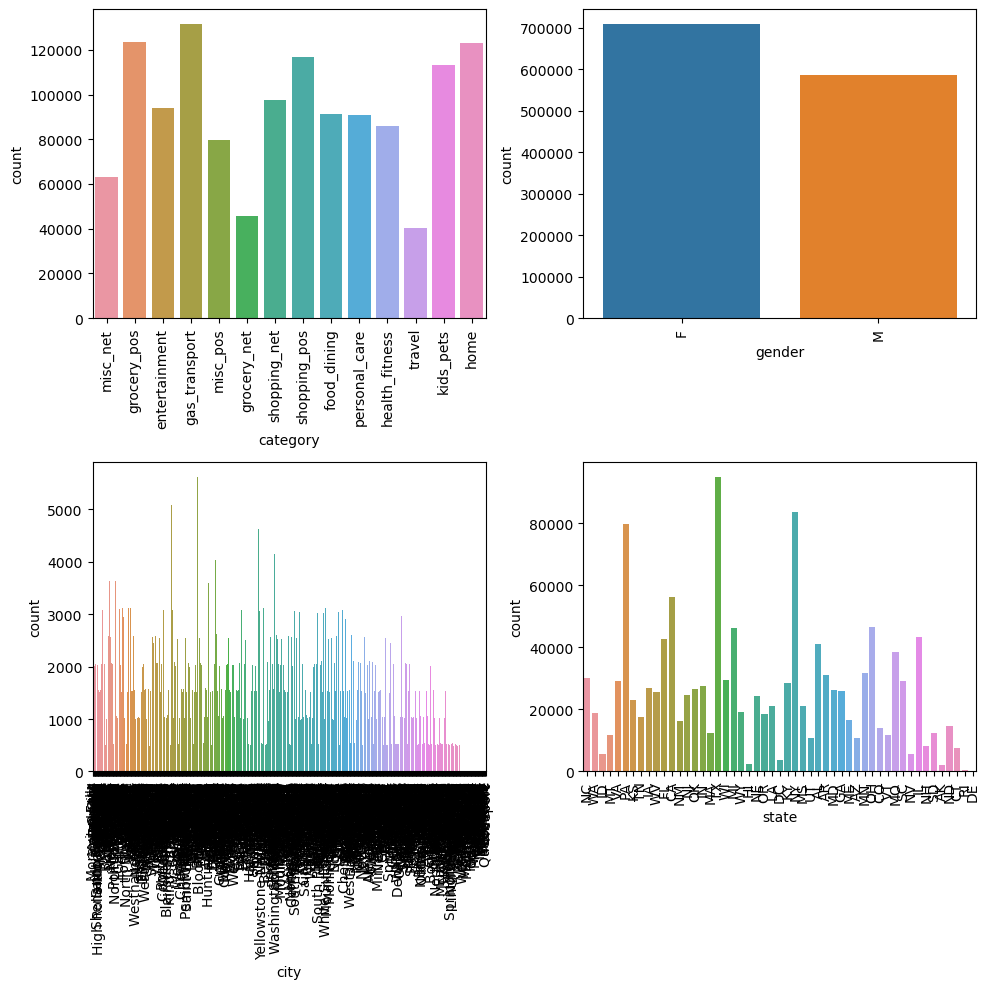

In [15]:
# This code cell plots the count of each of the categories with countplots
fig, ax = plt.subplots(2, 2, figsize = (10, 10))

sns.countplot(x = 'category', data = df_categorical, ax = ax[0, 0])
sns.countplot(x = 'gender', data = df_categorical, ax = ax[0, 1])
sns.countplot(x = 'city', data = df_categorical, ax = ax[1, 0])
sns.countplot(x = 'state', data = df_categorical, ax = ax[1, 1])

# Rotate x-tick labels by 45 degrees for all subplots
for i in range(2):
    for j in range(2):
        ax[i, j].set_xticklabels(ax[i, j].get_xticklabels(), rotation=90)
    
plt.tight_layout()
plt.show()

<AxesSubplot: >

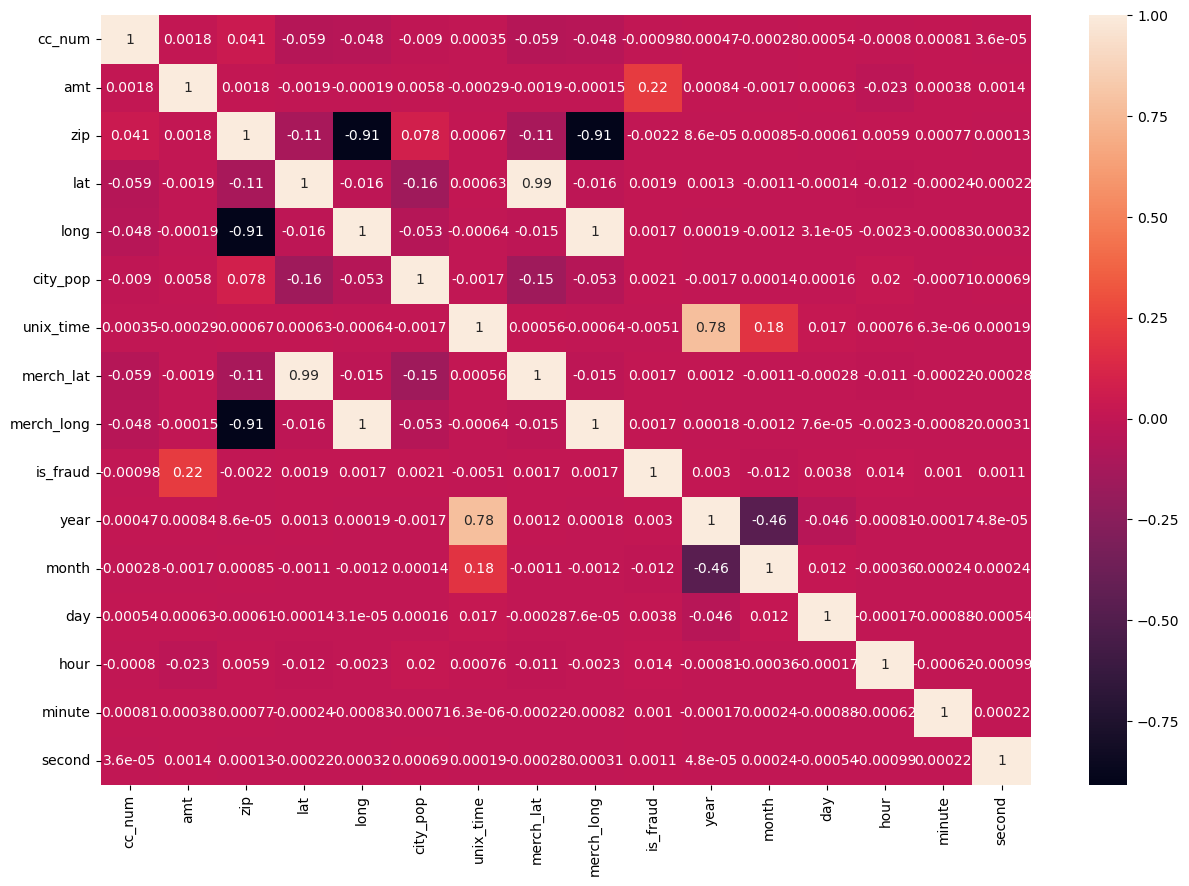

In [32]:
sns.heatmap(df.corr(), annot = True)

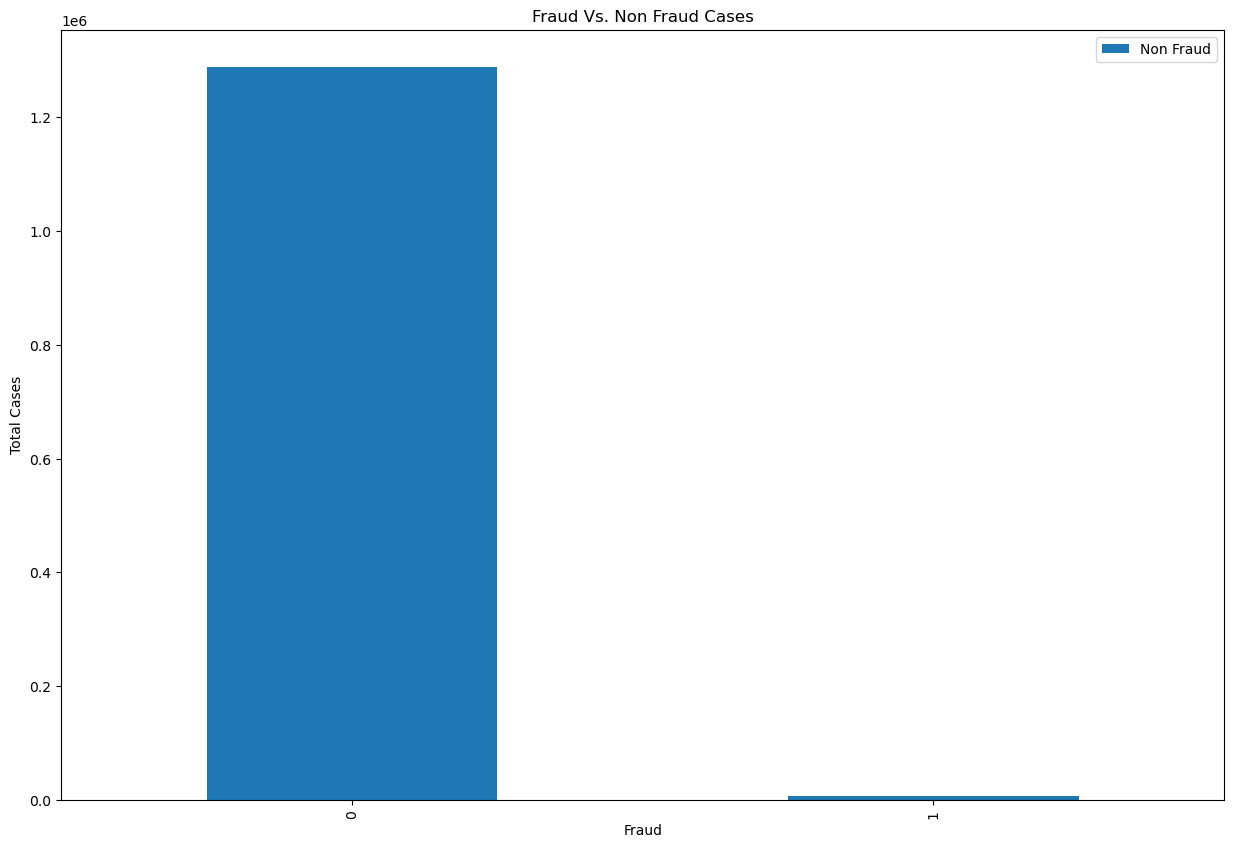

In [33]:
df['is_fraud'].value_counts().plot(kind = 'bar')
plt.title("Fraud Vs. Non Fraud Cases")
plt.xlabel("Fraud")
plt.ylabel("Total Cases")
plt.legend(['Non Fraud', 'Fraud'])
plt.show()

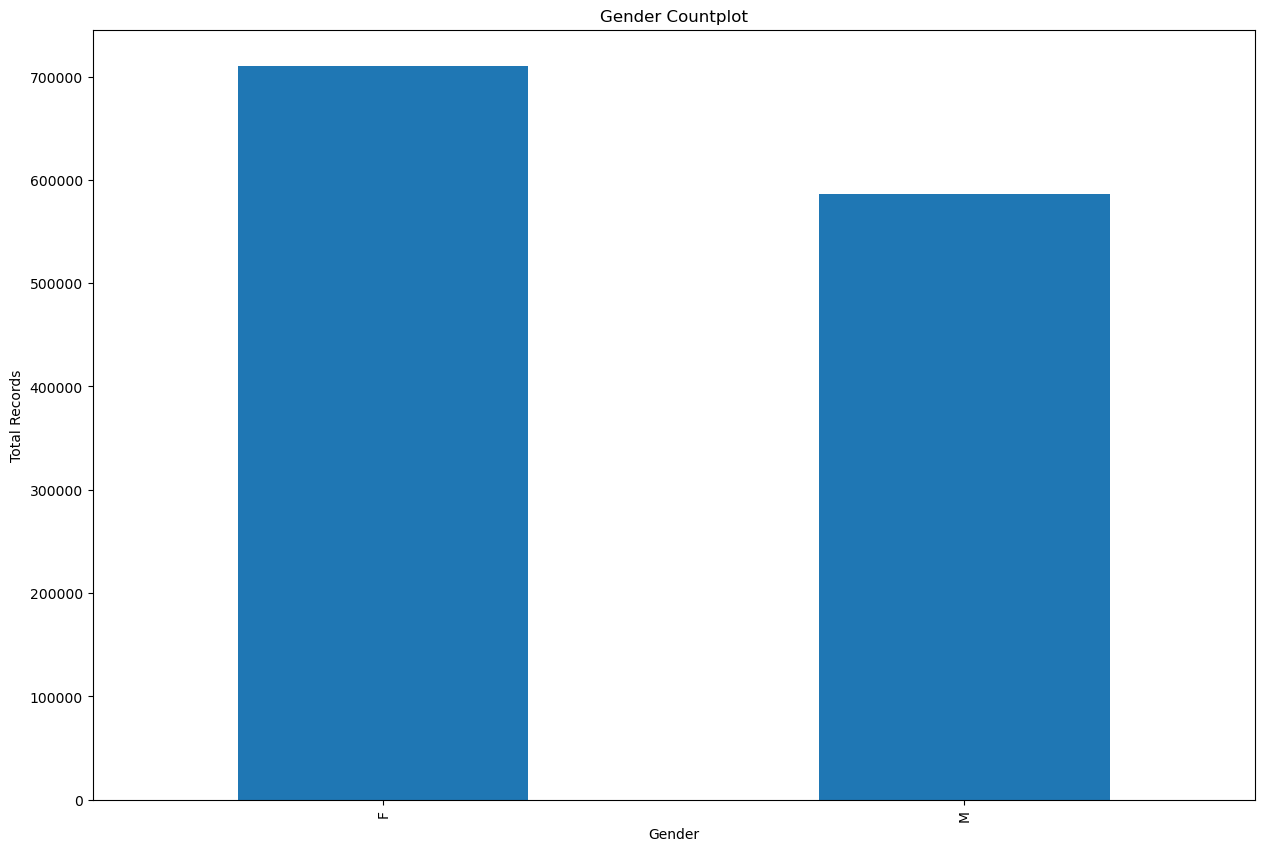

In [34]:
df['gender'].value_counts().plot(kind = 'bar')
plt.title("Gender Countplot")
plt.xlabel("Gender")
plt.ylabel("Total Records")
plt.show()

In [35]:
X = df.drop(['is_fraud'], axis = 1)
y = df['is_fraud'].values.reshape(-1, 1)

In [36]:
print("The shape of the input data: {}".format(X.shape))
print("The shape of the output data: {}".format(y.shape))

The shape of the input data: (1296675, 25)
The shape of the output data: (1296675, 1)


In [37]:
# Taking only less percentage of test examples as we have large amount of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.025, random_state = 101,
                                                   stratify = y)

In [38]:
print("The shape of the train data: {}".format(X_train.shape))
print("The shape of the test data: {}".format(X_test.shape))

The shape of the train data: (1264258, 25)
The shape of the test data: (32417, 25)


In [39]:
fraud_cases = df[df['is_fraud'] == 1]
non_fraud_cases = df[df['is_fraud'] == 0]

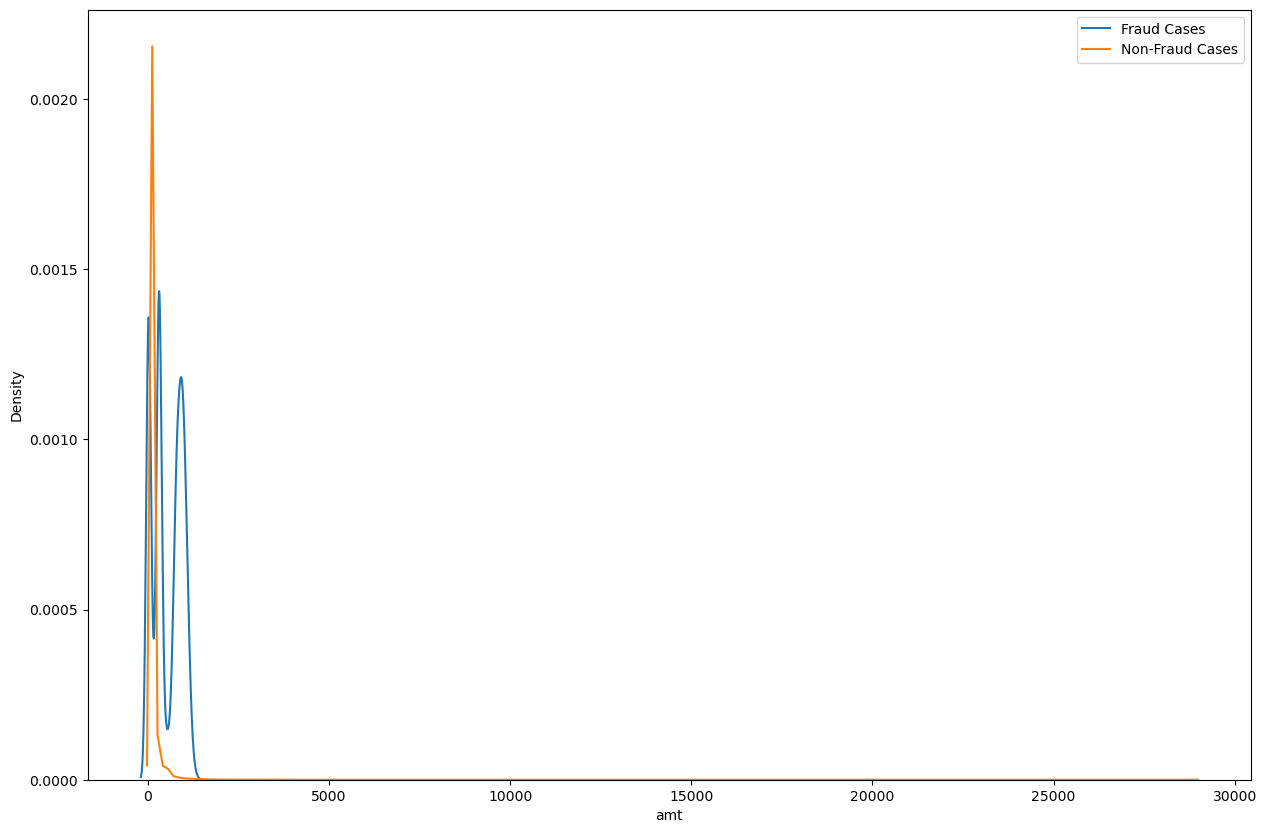

In [40]:
sns.kdeplot(fraud_cases['amt'], label = "Fraud Cases")
sns.kdeplot(non_fraud_cases['amt'], label = "Non-Fraud Cases")
plt.legend()
plt.show()

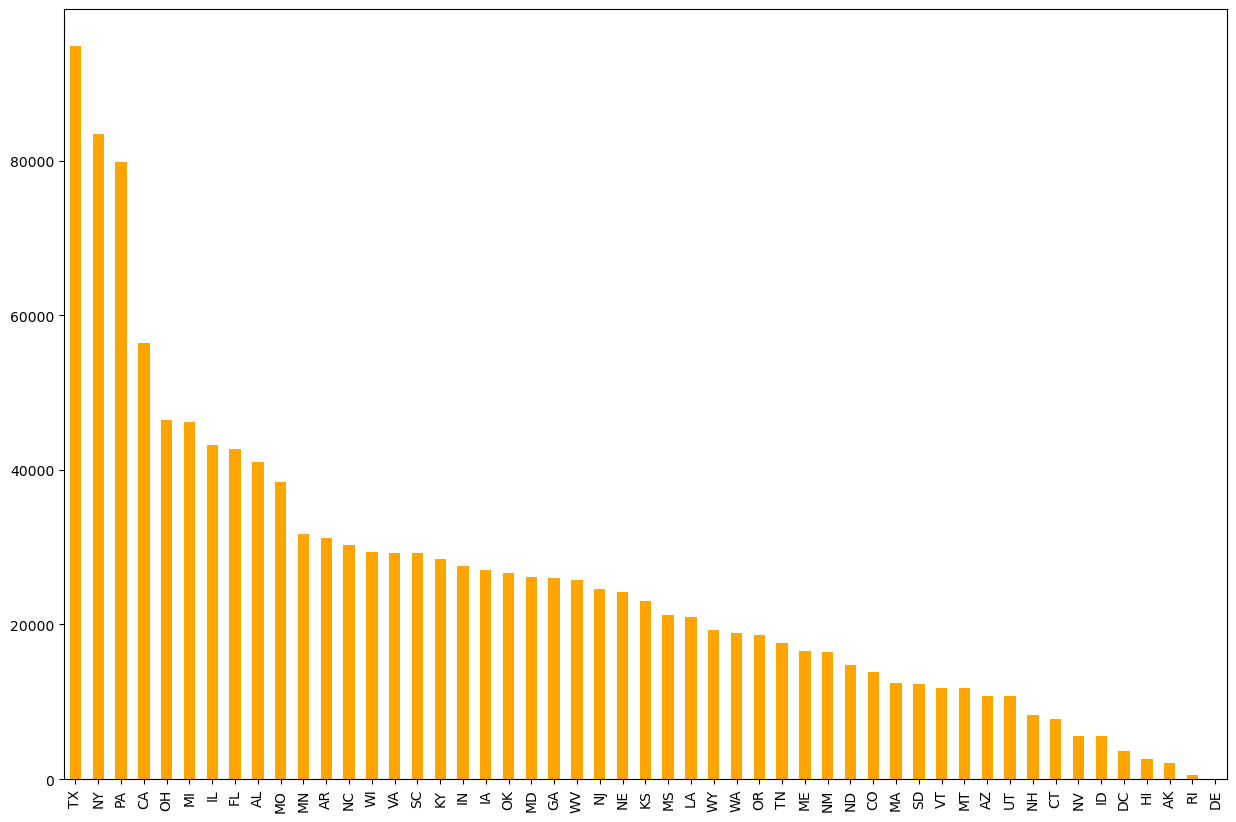

In [41]:
df['state'].value_counts().plot(kind = 'bar', color = 'orange')
plt.show()

<AxesSubplot: >

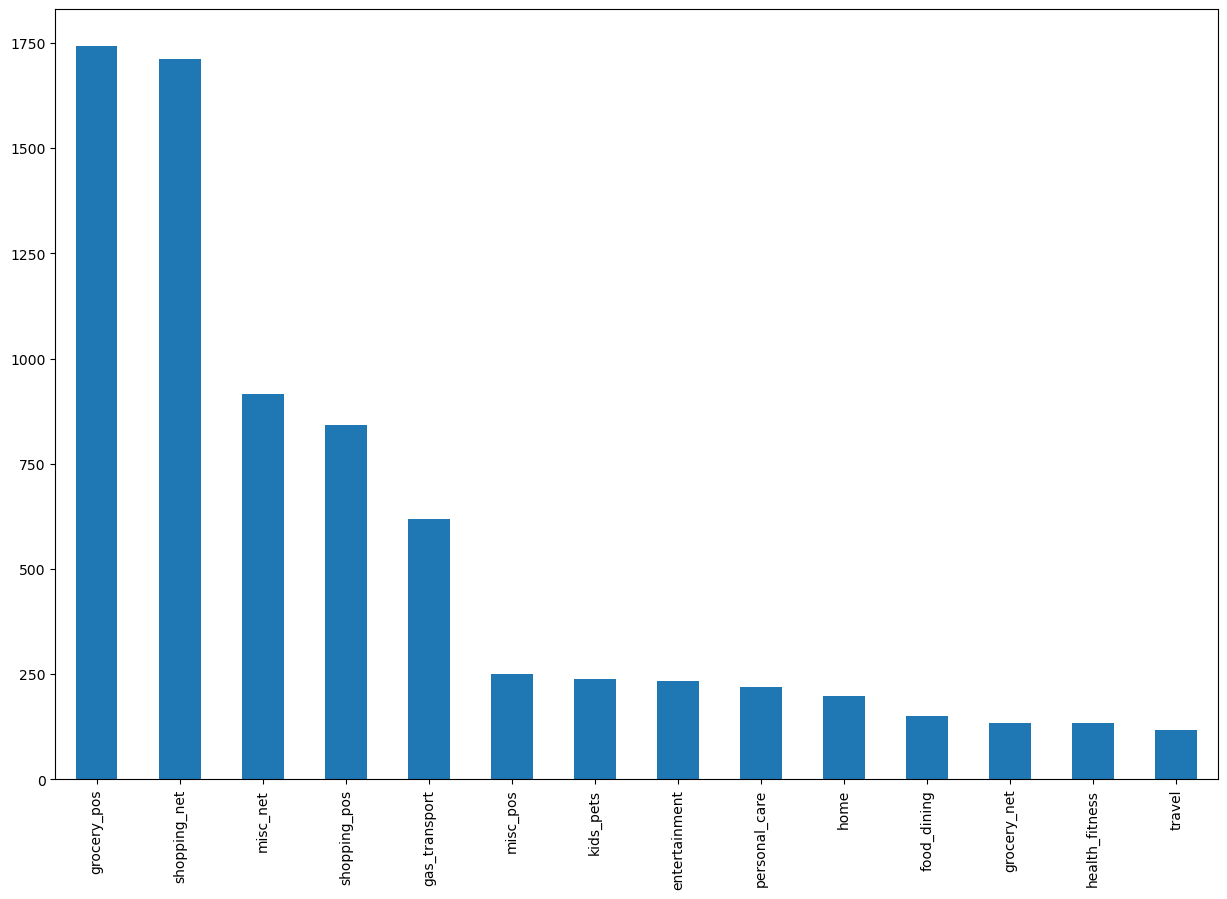

In [42]:
fraud_cases['category'].value_counts().plot(kind = 'bar')

<AxesSubplot: >

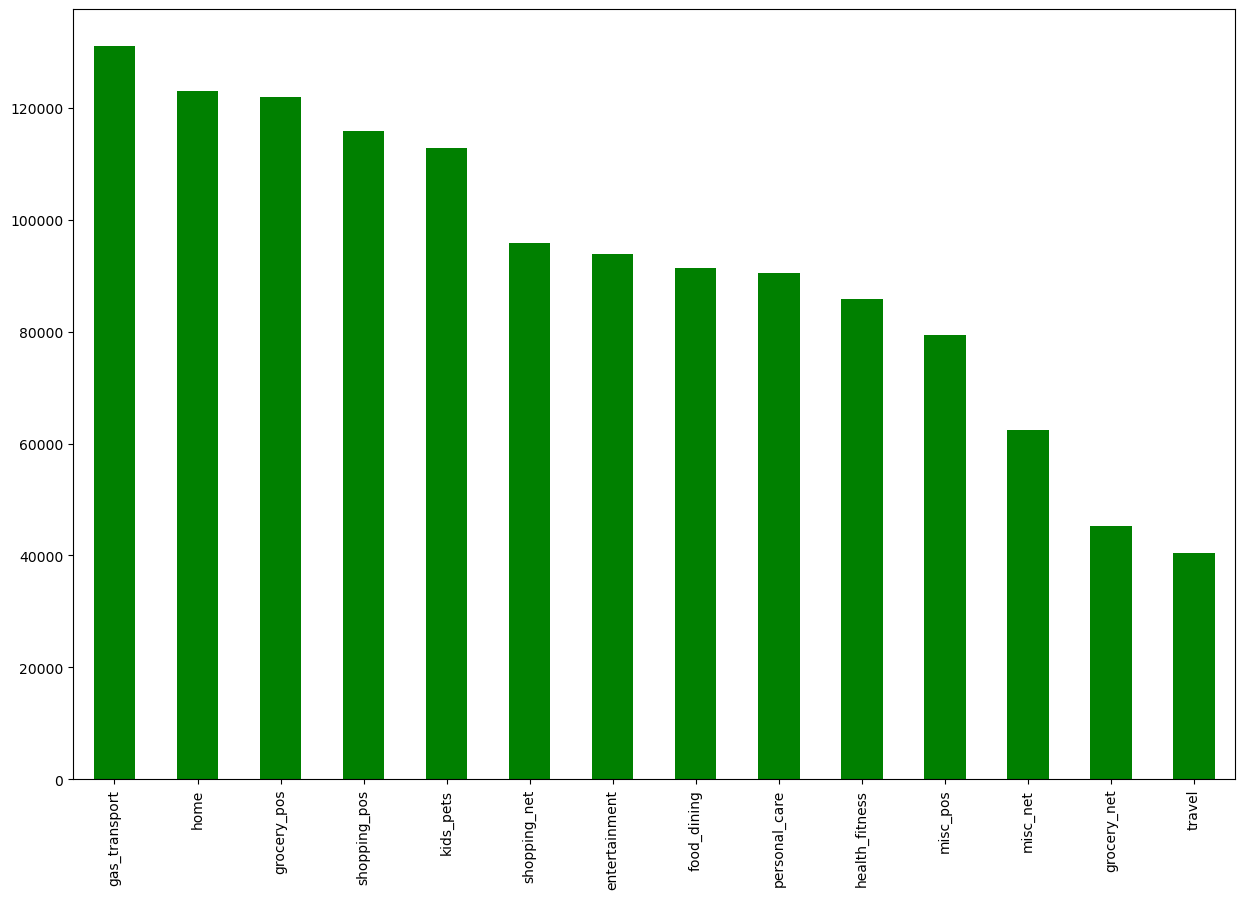

In [43]:
non_fraud_cases['category'].value_counts().plot(kind = 'bar', color = 'green')

<AxesSubplot: >

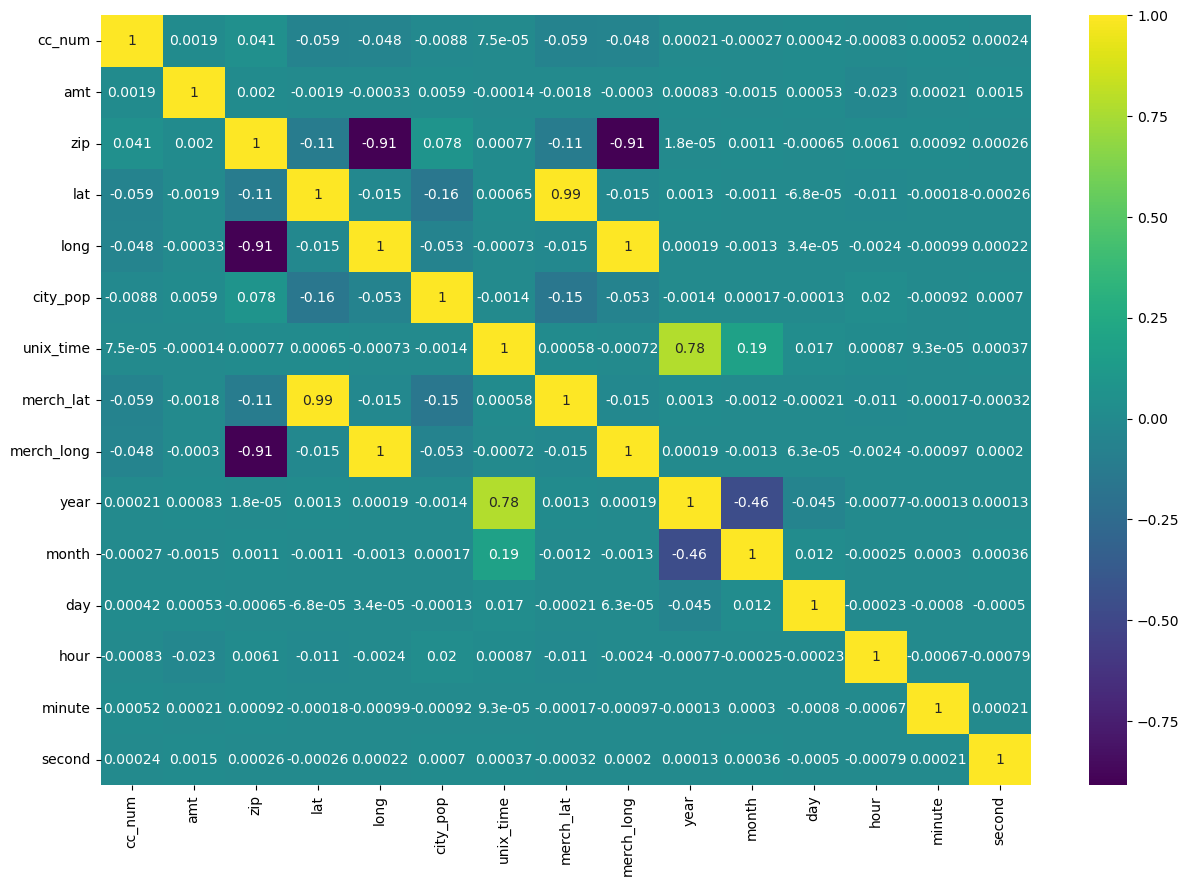

In [44]:
sns.heatmap(X_train.corr(), annot = True, cmap = 'viridis')

<AxesSubplot: >

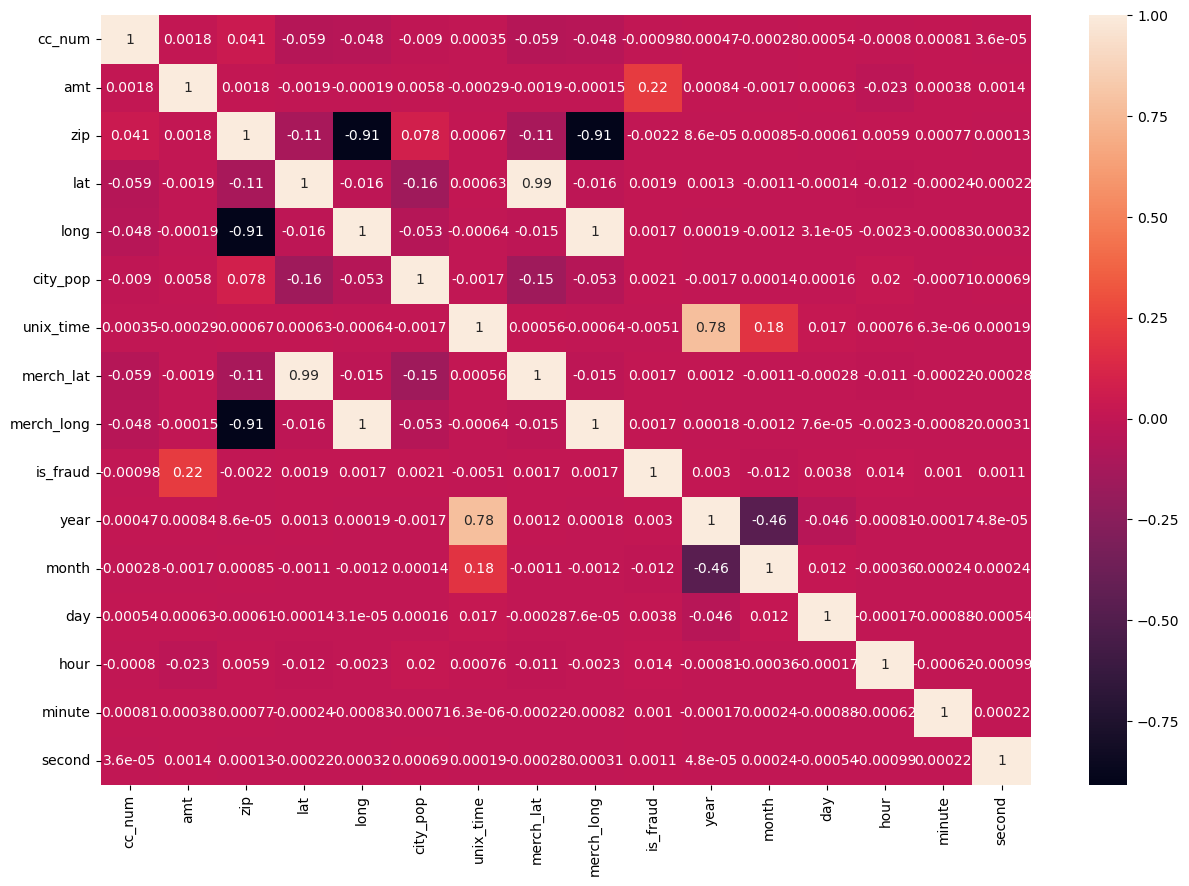

In [45]:
sns.heatmap(df.corr(), annot = True)

### One-Hot Encoding

In [51]:
from sklearn.preprocessing import OneHotEncoder

In [52]:
categorical_features = ['merchant', 'category', 'first', 'last', 'gender', 'city', 'state', 'job', 'zip',
                       'year', 'month', 'day', 'hour', 'minute', 'second', 'transac']
X_train_numerical = X_train.drop(categorical_features, axis = 1)
X_test_numerical = X_test.drop(categorical_features, axis = 1)

In [57]:
X_train_numerical.head()

,cc_num,amt,lat,long,city_pop,trans_num,unix_time,merch_lat,merch_long,transaction_date,category_mean,city_mean,state_mean,euclidean_distance
424954,4450831335606294,166.77,34.5906,-95.3800,1760,dd7544a24e1e54500528494fc6848a51,1341858861,35.263565,-96.310568,2019-07-09 18:34:21,54.203041,68.721242,67.081850,1.148407
414822,374656033243756,29.14,38.8954,-77.1633,207410,2754fa23e80fddada057186788987040,1341600345,38.147359,-76.818658,2019-07-06 18:45:45,57.505782,61.100087,70.762343,0.823616
1174163,30290551782700,1.72,36.8020,-87.8286,13422,c895c967630f5ab32dd624ae00159cc9,1367720732,36.436757,-86.989457,2020-05-05 02:25:32,64.157041,66.006345,66.263168,0.915185
371611,4797297220948468262,105.86,38.8938,-86.5246,1228,8a7c0421d73e4ac5ab0f7a25574d6034,1340273421,39.642489,-87.294020,2019-06-21 10:10:21,116.955815,49.439455,68.788637,1.073565
1108407,4736845434667908128,95.27,44.8816,-73.6408,2148,5fa221390ecbddebacfc4fd020c8d31d,1365240467,44.293910,-74.248301,2020-04-06 09:27:47,63.436090,65.145180,71.931236,0.845244


In [53]:
X_train_categorical = X_train[categorical_features]
X_test_categorical = X_test[categorical_features]

In [54]:
encoder = OneHotEncoder(handle_unknown = 'ignore')
X_train_ohe = encoder.fit_transform(X_train_categorical)
X_test_ohe = encoder.transform(X_test_categorical)

In [55]:
from scipy.sparse import hstack

In [56]:
X_train_encoded = hstack((X_train_numerical.values, X_train_ohe))
X_test_encoded = hstack((X_test_numerical.values, X_test_ohe))

TypeError: no supported conversion for types: (dtype('O'), dtype('float64'))

In [ ]:
X_train_encoded.shape

### Training an ML Model

In [320]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

In [325]:
# This cell can take about 5 mins as we are training a large dataset
xgb_model = xgb.XGBClassifier(n_estimators = 25, max_depth = 3, random_state = 101)
xgb_model.fit(X_train_encoded, y_train)

[22:52:41] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=25, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=101,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [326]:
y_predictions = xgb_model.predict(X_test_encoded)

In [327]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     32229
           1       0.42      0.77      0.55       188

    accuracy                           0.99     32417
   macro avg       0.71      0.88      0.77     32417
weighted avg       1.00      0.99      0.99     32417



In [328]:
confusion_matrix(y_test, y_predictions)

array([[32032,   197],
       [   43,   145]], dtype=int64)

### Training an ML Model with Feature Engineering

In [46]:
# Defining utility functions that are used later in code 

def euclidean_distance(lat1, long1, lat2, long2):
    
    dlat = lat2 - lat1
    dlong = long2 - long1
    euclidean_distance = (dlat ** 2 + dlong ** 2) ** 0.5
    
    return euclidean_distance

def big_transaction(data, amount = 5000):
    
    if data > amount:
        return 1
    else:
        return 0

In [47]:
X_train.head()

,cc_num,merchant,category,amt,first,last,gender,city,state,zip,...,unix_time,merch_lat,merch_long,transaction_date,year,month,day,hour,minute,second
424954,4450831335606294,"fraud_Hills, Hegmann and Schaefer",health_fitness,166.77,Donna,Davis,F,Clayton,OK,74536,...,1341858861,35.263565,-96.310568,2019-07-09 18:34:21,2019,7,9,18,34,21
414822,374656033243756,fraud_Nolan-Williamson,kids_pets,29.14,David,Lewis,M,Arlington,VA,22213,...,1341600345,38.147359,-76.818658,2019-07-06 18:45:45,2019,7,6,18,45,45
1174163,30290551782700,fraud_Johns-Hoeger,entertainment,1.72,John,Clarke,M,Cadiz,KY,42211,...,1367720732,36.436757,-86.989457,2020-05-05 02:25:32,2020,5,5,2,25,32
371611,4797297220948468262,fraud_Strosin-Cruickshank,grocery_pos,105.86,Erica,Briggs,F,Oolitic,IN,47451,...,1340273421,39.642489,-87.294020,2019-06-21 10:10:21,2019,6,21,10,10,21
1108407,4736845434667908128,fraud_Conroy-Cruickshank,gas_transport,95.27,Toni,Gomez,F,Altona,NY,12910,...,1365240467,44.293910,-74.248301,2020-04-06 09:27:47,2020,4,6,9,27,47


In [48]:
X_train['category_mean'] = X_train['category'].map(X_train.groupby(by = 'category').mean()['amt'])
X_train['city_mean'] = X_train['city'].map(X_train.groupby(by = 'city').mean()['amt'])
X_train['state_mean'] = X_train['state'].map(X_train.groupby(by = 'state').mean()['amt'])

X_test['category_mean'] = X_test['category'].map(X_train.groupby(by = 'category').mean()['amt'])
X_test['city_mean'] = X_test['city'].map(X_train.groupby(by = 'city').mean()['amt'])
X_test['state_mean'] = X_test['state'].map(X_train.groupby(by = 'state').mean()['amt'])

In [49]:
lat1 = X_train['lat']
long1 = X_train['long']
lat2 = X_train['merch_lat']
long2 = X_train['merch_long']

X_train['euclidean_distance'] = euclidean_distance(lat1, long1, lat2, long2)

In [50]:
lat1 = X_test['lat']
long1 = X_test['long']
lat2 = X_test['merch_lat']
long2 = X_test['merch_long']

X_test['euclidean_distance'] = euclidean_distance(lat1, long1, lat2, long2)

In [309]:
X_train['big_transaction'] = X_train['amt'].apply(big_transaction)
X_test['big_transaction'] = X_test['amt'].apply(big_transaction)

<AxesSubplot: xlabel='euclidean_distance', ylabel='Density'>

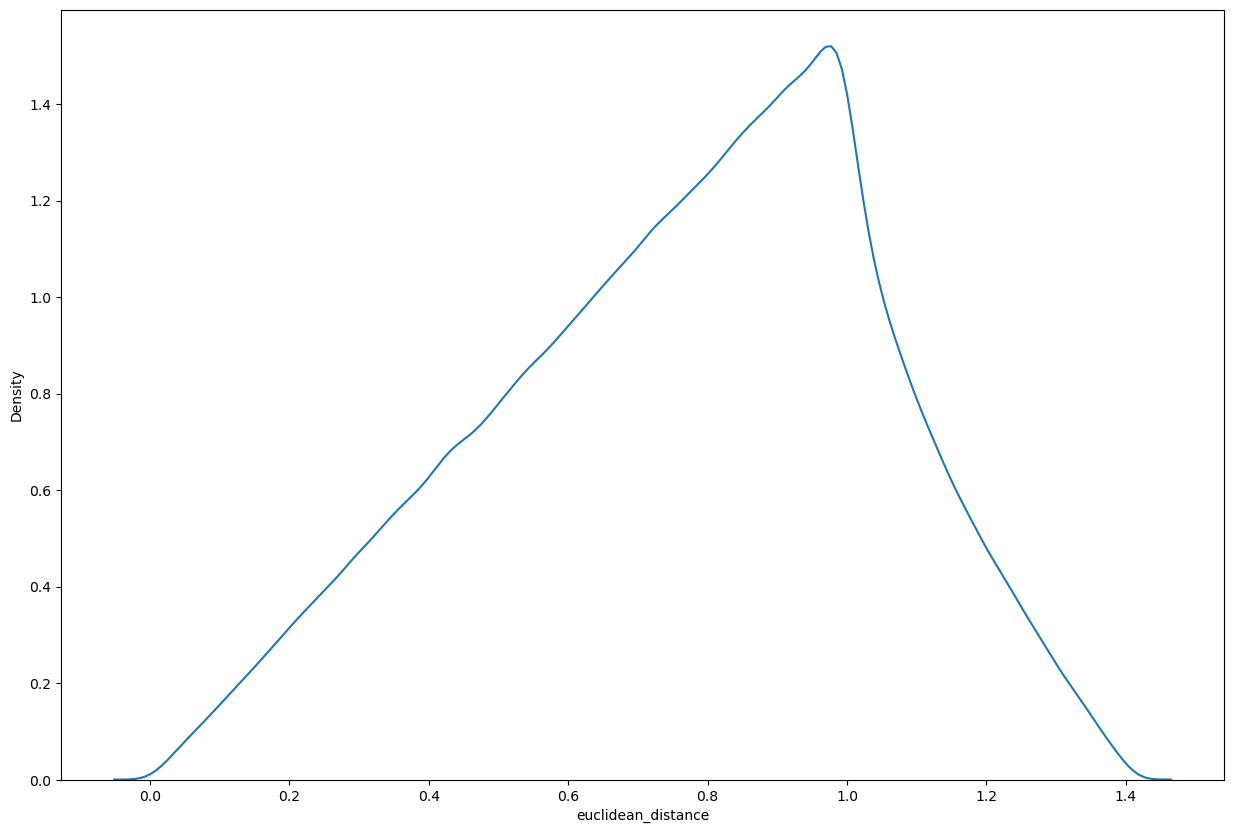

In [310]:
sns.kdeplot(X_train['euclidean_distance'])

In [311]:
X_train.head()

,merchant,category,amt,first,last,gender,city,state,zip,lat,...,month,day,hour,minute,second,euclidean_distance,big_transaction,category_mean,city_mean,state_mean
424954,"fraud_Hills, Hegmann and Schaefer",health_fitness,166.77,Donna,Davis,F,Clayton,OK,74536,34.5906,...,7,9,18,34,21,1.148407,0,54.203041,68.721242,67.081850
414822,fraud_Nolan-Williamson,kids_pets,29.14,David,Lewis,M,Arlington,VA,22213,38.8954,...,7,6,18,45,45,0.823616,0,57.505782,61.100087,70.762343
1174163,fraud_Johns-Hoeger,entertainment,1.72,John,Clarke,M,Cadiz,KY,42211,36.8020,...,5,5,2,25,32,0.915185,0,64.157041,66.006345,66.263168
371611,fraud_Strosin-Cruickshank,grocery_pos,105.86,Erica,Briggs,F,Oolitic,IN,47451,38.8938,...,6,21,10,10,21,1.073565,0,116.955815,49.439455,68.788637
1108407,fraud_Conroy-Cruickshank,gas_transport,95.27,Toni,Gomez,F,Altona,NY,12910,44.8816,...,4,6,9,27,47,0.845244,0,63.436090,65.145180,71.931236


In [312]:
X_train.columns

Index(['merchant', 'category', 'amt', 'first', 'last', 'gender', 'city',
       'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'unix_time',
       'merch_lat', 'merch_long', 'year', 'month', 'day', 'hour', 'minute',
       'second', 'euclidean_distance', 'big_transaction', 'category_mean',
       'city_mean', 'state_mean'],
      dtype='object')

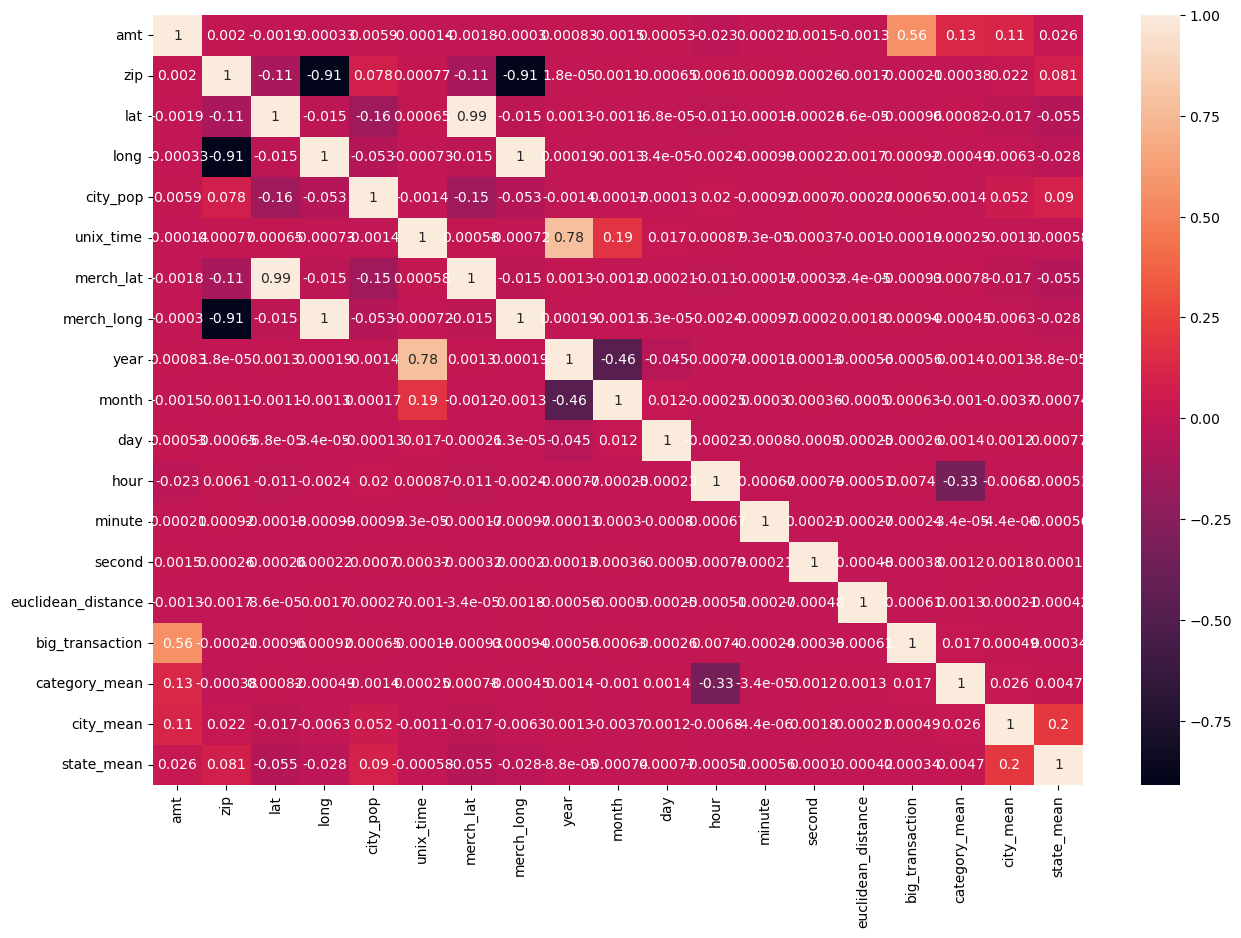

In [330]:
sns.heatmap(X_train.corr(), annot = True)
plt.show()

### Scaling

In [187]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [188]:
# This cell can take about 5 minutes to run as it is training on oversampled data
xgb_model = xgb.XGBClassifier(n_estimators = 25, max_depth = 2, random_state = 101)
xgb_model.fit(X_train_scaled, y_train)

[22:04:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=25, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=101,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [189]:
y_predictions = xgb_model.predict(X_test_scaled)

In [190]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32229
           1       0.92      0.63      0.75       188

    accuracy                           1.00     32417
   macro avg       0.96      0.82      0.87     32417
weighted avg       1.00      1.00      1.00     32417



In [191]:
confusion_matrix(y_test, y_predictions)

array([[32218,    11],
       [   69,   119]], dtype=int64)

### SMOTE Oversampling

In [192]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 101)

X_train_oversampled_tuple = smote.fit_resample(X_train_encoded, y_train)

In [193]:
# Reading the input and output from the tuple
X_train_oversampled = X_train_oversampled_tuple[0]
y_train_oversampled = X_train_oversampled_tuple[1]

In [194]:
print("The initial shape of the training dataset: {}".format(X_train_encoded.shape))
print("The shape of oversampled training dataset: {}".format(X_train_oversampled.shape))

The initial shape of the training dataset: (1264258, 4148)
The shape of oversampled training dataset: (2513880, 4148)


In [195]:
# This cell can take about 5-10 mins as we are training a large dataset
xgb_model = xgb.XGBClassifier(n_estimators = 25, max_depth = 3, random_state = 101, n_jobs = 30)
xgb_model.fit(X_train_oversampled, y_train_oversampled)

[22:05:53] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=25, n_jobs=30,
              num_parallel_tree=1, predictor='auto', random_state=101,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [196]:
y_predictions = xgb_model.predict(X_test_encoded)

In [197]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     32229
           1       0.24      0.77      0.37       188

    accuracy                           0.98     32417
   macro avg       0.62      0.88      0.68     32417
weighted avg       0.99      0.98      0.99     32417



### Random Undersampling

In [201]:
from imblearn.under_sampling import RandomUnderSampler

random_undersampler = RandomUnderSampler(random_state = 101, sampling_strategy = 'majority')

X_train_undersampled_tuple = random_undersampler.fit_resample(X_train_encoded, y_train)

In [202]:
# Reading the input and output from the tuple
X_train_undersampled = X_train_undersampled_tuple[0]
y_train_undersampled = X_train_undersampled_tuple[1]

In [203]:
print("The initial shape of the training dataset: {}".format(X_train_encoded.shape))
print("The shape of undersampled training dataset: {}".format(X_train_undersampled.shape))

The initial shape of the training dataset: (1264258, 4148)
The shape of oversampled training dataset: (14636, 4148)


In [210]:
# This cell can take about 5-10 mins as we are training a large dataset
xgb_model = xgb.XGBClassifier(n_estimators = 200, max_depth = 5, random_state = 101, n_jobs = 30)
xgb_model.fit(X_train_undersampled, y_train_undersampled)

[22:10:44] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=30,
              num_parallel_tree=1, predictor='auto', random_state=101,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [211]:
y_predictions = xgb_model.predict(X_test_encoded)

In [212]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     32229
           1       0.19      0.97      0.31       188

    accuracy                           0.98     32417
   macro avg       0.59      0.97      0.65     32417
weighted avg       1.00      0.98      0.98     32417



### Random Oversampling

In [214]:
from imblearn.over_sampling import RandomOverSampler

random_oversampler = RandomOverSampler(random_state = 101, sampling_strategy = 'minority')

X_train_oversampled_tuple = random_oversampler.fit_resample(X_train_encoded, y_train)

In [215]:
# Reading the input and output from the tuple
X_train_oversampled = X_train_oversampled_tuple[0]
y_train_oversampled = X_train_oversampled_tuple[1]

In [216]:
print("The initial shape of the training dataset: {}".format(X_train_encoded.shape))
print("The shape of oversampled training dataset: {}".format(X_train_oversampled.shape))

The initial shape of the training dataset: (1264258, 4148)
The shape of oversampled training dataset: (2513880, 4148)


In [223]:
# This cell can take about 5-10 mins as we are training a large dataset
xgb_model = xgb.XGBClassifier(n_estimators = 25, max_depth = 3, random_state = 101, n_jobs = 30)
xgb_model.fit(X_train_oversampled, y_train_oversampled)

[22:24:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=25, n_jobs=30,
              num_parallel_tree=1, predictor='auto', random_state=101,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [224]:
y_predictions = xgb_model.predict(X_test_encoded)

In [225]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     32229
           1       0.14      0.95      0.25       188

    accuracy                           0.97     32417
   macro avg       0.57      0.96      0.61     32417
weighted avg       0.99      0.97      0.98     32417



In [226]:
df.head()

,merchant,category,amt,first,last,gender,city,state,zip,lat,...,unix_time,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,second
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,Moravian Falls,NC,28654,36.0788,...,1325376018,36.011293,-82.048315,0,2019,1,1,0,0,18
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,Orient,WA,99160,48.8878,...,1325376044,49.159047,-118.186462,0,2019,1,1,0,0,44
2,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,Malad City,ID,83252,42.1808,...,1325376051,43.150704,-112.154481,0,2019,1,1,0,0,51
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,Boulder,MT,59632,46.2306,...,1325376076,47.034331,-112.561071,0,2019,1,1,0,1,16
4,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,Doe Hill,VA,24433,38.4207,...,1325376186,38.674999,-78.632459,0,2019,1,1,0,3,6


In [227]:
X_train_numerical.head()

,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,euclidean_distance
424954,166.77,34.5906,-95.3800,1760,1341858861,35.263565,-96.310568,1.148407
414822,29.14,38.8954,-77.1633,207410,1341600345,38.147359,-76.818658,0.823616
1174163,1.72,36.8020,-87.8286,13422,1367720732,36.436757,-86.989457,0.915185
371611,105.86,38.8938,-86.5246,1228,1340273421,39.642489,-87.294020,1.073565
1108407,95.27,44.8816,-73.6408,2148,1365240467,44.293910,-74.248301,0.845244


In [228]:
X_train_categorical.head()

,merchant,category,first,last,gender,city,state,job,zip,year,month,day,hour,minute,second
424954,"fraud_Hills, Hegmann and Schaefer",health_fitness,Donna,Davis,F,Clayton,OK,Occupational psychologist,74536,2019,7,9,18,34,21
414822,fraud_Nolan-Williamson,kids_pets,David,Lewis,M,Arlington,VA,Mudlogger,22213,2019,7,6,18,45,45
1174163,fraud_Johns-Hoeger,entertainment,John,Clarke,M,Cadiz,KY,Commissioning editor,42211,2020,5,5,2,25,32
371611,fraud_Strosin-Cruickshank,grocery_pos,Erica,Briggs,F,Oolitic,IN,Counsellor,47451,2019,6,21,10,10,21
1108407,fraud_Conroy-Cruickshank,gas_transport,Toni,Gomez,F,Altona,NY,"Surveyor, land/geomatics",12910,2020,4,6,9,27,47
